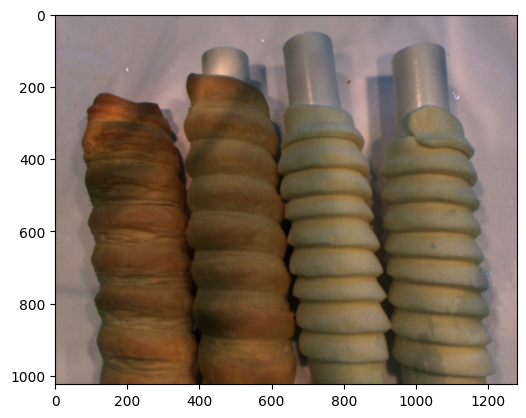

In [1]:
import spectral
import numpy as np
import matplotlib.pyplot as plt
from spectral import settings
from z_samTool import SAM2ImageProcessor
from z_hyperData import HyperData

hyper_path = r'D:\00-dataset\高光谱\号角酥（生熟左边两个）.hdr'

hyper_tool = HyperData()
data_cube, rgb_image, hyper_sprectrumList = hyper_tool.read_hdr_file(hyper_path)

plt.imshow(rgb_image)

In [2]:
checkpoint = "D:/01-code/00-python/sam2_label/checkpoints/sam2.1_hiera_base_plus.pt"
model_cfg  = "D:/01-code/00-python/sam2_label/sam2/configs/sam2.1/sam2.1_hiera_b+.yaml"
processor = SAM2ImageProcessor(checkpoint, model_cfg)

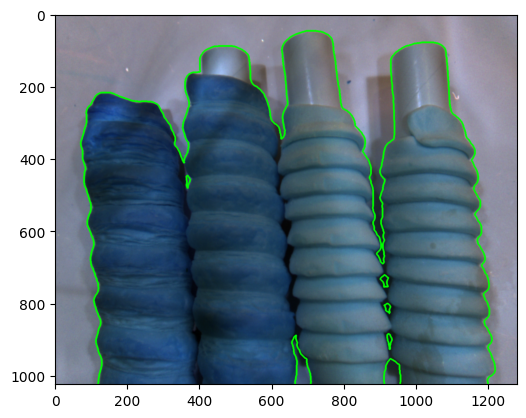

In [3]:
height, width = rgb_image.shape[:2]
mask_mat = processor.process_image_box(rgb_image, [0, 0, width, height])
mask_mat, show_mat = processor.get_used_show_image(rgb_image, mask_mat, 25, 100)
plt.imshow(show_mat)

In [4]:
mean, min_, max_ = hyper_tool.extract_band(data_cube, mask_mat)
mean

array([0.27549505, 0.33671576, 0.36542004, 0.36896294, 0.36875242,
       0.37276134, 0.38383222, 0.4016406 , 0.4376824 , 0.47123897,
       0.4960918 , 0.5230862 , 0.549078  , 0.5712622 , 0.5895805 ,
       0.60479593, 0.6169978 , 0.6257619 , 0.6480869 , 0.6797789 ,
       0.6983518 , 0.7069504 , 0.7156657 , 0.72519636, 0.73553437,
       0.75209326, 0.76847523, 0.7773214 , 0.7846214 , 0.7920013 ,
       0.7963728 , 0.7983458 , 0.7993174 , 0.8001106 , 0.8009587 ,
       0.8025373 , 0.8050568 , 0.80826664, 0.8116056 , 0.81459737,
       0.8173652 , 0.8198868 , 0.82191867, 0.8235158 , 0.82465595,
       0.824531  , 0.82225823, 0.81748056, 0.8102368 , 0.8011443 ,
       0.79166824, 0.7838795 , 0.77943766, 0.7781827 , 0.77630335,
       0.7732367 ], dtype=float32)